In [1]:
import pandas as pd

In [123]:
raw_data = pd.read_csv('players.csv', index_col=['PLAYER_NAME'])
raw_data

,PLAYER_ID,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,POINTS,DRIVE_PTS,DRIVE_FG_PCT,...,PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,PlayerPosition
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Aaron Brooks,201166,1610612750,MIN,21,12,9,7.2,2.5,1.0,0.435,...,205,186,175,181,192,197,116,5,"201166,1610612750",G
Aaron Gordon,203932,1610612753,ORL,36,12,24,33.7,18.6,3.3,0.406,...,34,43,21,20,15,16,115,5,"203932,1610612753",F
Abdel Nader,1627846,1610612738,BOS,21,16,5,7.4,1.9,0.5,0.444,...,124,217,190,188,204,197,213,5,"1627846,1610612738",F
Adreian Payne,203940,1610612753,ORL,5,0,5,8.5,4.2,0.4,1.000,...,137,35,202,211,175,200,4,5,"203940,1610612753",F
Al Horford,201143,1610612738,BOS,42,30,12,32.7,13.3,1.5,0.565,...,79,15,18,15,18,16,58,5,"201143,1610612738",C
Al Jefferson,2744,1610612754,IND,19,8,11,13.9,6.7,0.1,0.500,...,70,21,63,63,42,42,43,5,"2744,1610612754",C
Al-Farouq Aminu,202329,1610612757,POR,32,15,17,30.2,9.8,1.4,0.396,...,102,109,93,79,79,67,165,5,"202329,1610612757",F
Alec Burks,202692,1610612762,UTA,41,17,24,18.3,9.1,3.2,0.344,...,201,49,84,81,104,93,137,5,"202692,1610612762",G
Alec Peters,1628409,1610612756,PHX,4,0,4,11.4,2.8,0.0,0.000,...,147,170,208,207,192,183,203,5,"1628409,1610612756",F


In [124]:
headers = list(raw_data)
keep_columns = [x for x in headers if x not in set(['PLAYER_ID', 'TEAM_ABBREVIATION', 'TEAM_ID', 'CFPARAMS', 'CFID'])]
print(keep_columns)

['GP', 'W', 'L', 'MIN', 'POINTS', 'DRIVE_PTS', 'DRIVE_FG_PCT', 'CATCH_SHOOT_PTS', 'CATCH_SHOOT_FG_PCT', 'PULL_UP_PTS', 'PULL_UP_FG_PCT', 'PAINT_TOUCH_PTS', 'PAINT_TOUCH_FG_PCT', 'POST_TOUCH_PTS', 'POST_TOUCH_FG_PCT', 'ELBOW_TOUCH_PTS', 'ELBOW_TOUCH_FG_PCT', 'EFF_FG_PCT', 'AGE', 'W_PCT', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PACE', 'PIE', 'FGM', 'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK', 'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'EFG_PCT_RANK', 'TS_PCT_RANK', 'USG_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'FGM_RANK', 'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK', 'PlayerPosition']


In [203]:
stat_data = raw_data[keep_columns].copy()
stat_data.replace({'PlayerPosition': {'G': '0', 'F': '1', 'C': '2'}}, inplace=True)

In [204]:
from sklearn.decomposition import PCA

In [205]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(stat_data.values)
print(pca_result)

[[-315.37302571  -84.10294703  -98.18759254]
 [ 352.43861597 -140.45625122  120.40234912]
 [-376.82997813 -191.35619018  -42.6510141 ]
 ..., 
 [ 314.73285991 -178.59485179  135.53378226]
 [  73.9387156   360.14034104  -67.98417166]
 [-160.59492467  172.17347897  -32.52902195]]


In [206]:
stat_data['pca-one'] = pca_result[:,0]
stat_data['pca-two'] = pca_result[:,1] 
stat_data['pca-three'] = pca_result[:,2]

In [213]:
stat_data.to_csv('pca.csv')

In [113]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.49799979  0.15071263  0.0547241 ]


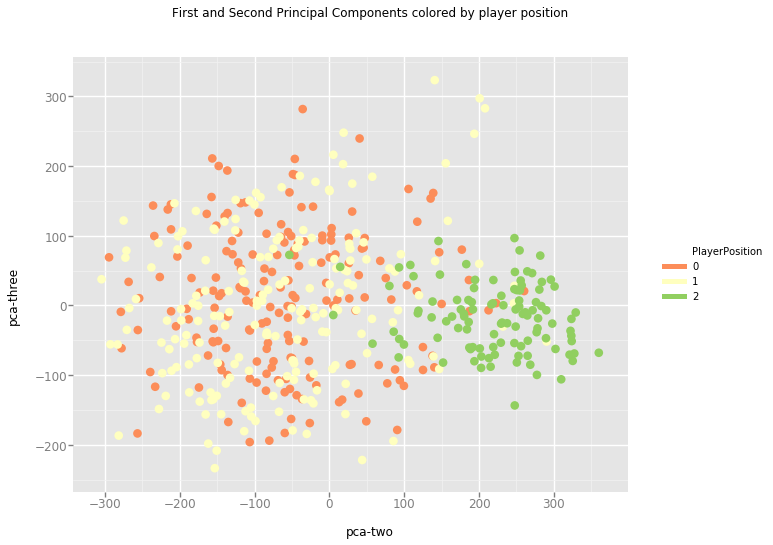

<ggplot: (8759668056398)>

In [210]:
from ggplot import *

chart = ggplot(stat_data, aes(x='pca-one', y='pca-two', color='PlayerPosition')) \
        + geom_point(size=75,alpha=1) \
        + scale_color_brewer(type='div', palette=8) \
        + ggtitle("First and Second Principal Components colored by player position")
chart